# 전처리

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.8 MB/s 
     |████████████████████████████████| 465 kB 53.5 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-11-09 04:40:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df1 = pd.read_excel('/content/한국어_단발성_대화_데이터셋.xlsx', usecols = [0, 1])
df1

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [ ]:
df2 = pd.read_excel('/content/한국어_연속적_대화_데이터셋.xlsx', usecols = [1, 2])
df2

,Unnamed: 1,Unnamed: 2
0,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
df2_ = df2.drop(0)
df2_.columns = ['Sentence', 'Emotion']
df2_

,Sentence,Emotion
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
data = pd.concat([df1, df2_])
data

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
data.isnull().sum()

Sentence    1
Emotion     7
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

In [ ]:
data['Emotion'].value_counts()

중립     48616
놀람     10764
분노      9293
슬픔      7239
행복      7067
혐오      5649
공포      5566
ㅍ         12
분          4
ㅈ중립        1
분ㄴ         1
중림         1
ㄴ중립        1
줄          1
Name: Emotion, dtype: int64

In [ ]:
data = data.replace({'Emotion': '분'}, '분노')
data = data.replace({'Emotion': '분ㄴ'}, '분노')
data = data.replace({'Emotion': 'ㅈ중립'}, '중립')
data = data.replace({'Emotion': '중림'}, '중립')
data = data.replace({'Emotion': 'ㄴ중립'}, '중립')

In [ ]:
d1 = data[data['Emotion'].str.contains('ㅍ')].index
d2 = data[data['Emotion'].str.contains('줄')].index

data.drop(d1, inplace = True)
data.drop(d2, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data['Emotion'].value_counts()

중립    48618
놀람    10764
분노     9298
슬픔     7239
행복     7062
혐오     5645
공포     5566
Name: Emotion, dtype: int64

In [ ]:
data['clean_text'] = data['Sentence'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "", regex=True)
data['clean_text'].replace('', np.nan, inplace=True)
data = data.dropna(how='any').reset_index(drop=True)
data.head()

,Sentence,Emotion,clean_text
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,언니 동생으로 부르는게 맞는 일인가요
1,그냥 내 느낌일뿐겠지?,공포,그냥 내 느낌일뿐겠지
2,아직너무초기라서 그런거죠?,공포,아직너무초기라서 그런거죠
3,유치원버스 사고 낫다던데,공포,유치원버스 사고 낫다던데
4,근데 원래이런거맞나요,공포,근데 원래이런거맞나요


In [ ]:
data['Emotion'].value_counts()

중립    48611
놀람    10763
분노     9298
슬픔     7239
행복     7062
혐오     5645
공포     5566
Name: Emotion, dtype: int64

In [ ]:
mecab = Mecab()

In [ ]:
!pip install konlpy
import re
from konlpy.tag import Okt, Komoran

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def mtokenize(sentence):
  result = []
  tokens = mecab.morphs(sentence)
  # for word in tokens:
  #   if word not in stopwords:
  #     result.append(word)
  # if len(result) != 0:
  #   return result
  if len(tokens) !=0 :
    return tokens
  else:
    return np.nan

In [ ]:
data['tokens'] = data['clean_text'].apply(lambda x: mtokenize(x))
print(data['tokens'])
data = data.dropna().reset_index(drop=True)
data.head()

0                     [언니, 동생, 으로, 부르, 는, 게, 맞, 는, 일, 인가요]
1                                  [그냥, 내, 느낌, 일, 뿐, 겠, 지]
2                               [아직, 너무, 초기, 라서, 그런, 거, 죠]
3                                    [유치원, 버스, 사고, 낫, 다던데]
4                                   [근데, 원래, 이런, 거, 맞, 나요]
                               ...                        
94179                                [얘긴, 다, 끝, 났, 냐, 원예부]
94180                        [예, 그거, 때문, 에, 부탁, 이, 있, 는데요]
94181                      [여자, 숨겨, 달, 라는, 거, 면, 사절, 이, 다]
94182                                     [아무래도, 안, 되, 나요]
94183    [그, 여자, 랑, 내, 가, 무슨, 상관, 인데, 아까, 는, 탐정, 님, 이, ...
Name: tokens, Length: 94184, dtype: object


,Sentence,Emotion,clean_text,tokens
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,언니 동생으로 부르는게 맞는 일인가요,"[언니, 동생, 으로, 부르, 는, 게, 맞, 는, 일, 인가요]"
1,그냥 내 느낌일뿐겠지?,공포,그냥 내 느낌일뿐겠지,"[그냥, 내, 느낌, 일, 뿐, 겠, 지]"
2,아직너무초기라서 그런거죠?,공포,아직너무초기라서 그런거죠,"[아직, 너무, 초기, 라서, 그런, 거, 죠]"
3,유치원버스 사고 낫다던데,공포,유치원버스 사고 낫다던데,"[유치원, 버스, 사고, 낫, 다던데]"
4,근데 원래이런거맞나요,공포,근데 원래이런거맞나요,"[근데, 원래, 이런, 거, 맞, 나요]"


In [ ]:
labels = list(np.unique(data['Emotion']))
labels

['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']

In [ ]:
data['label'] = data['Emotion'].apply(lambda x :labels.index(x) )
data.head()

,Sentence,Emotion,clean_text,tokens,label
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,언니 동생으로 부르는게 맞는 일인가요,"[언니, 동생, 으로, 부르, 는, 게, 맞, 는, 일, 인가요]",0
1,그냥 내 느낌일뿐겠지?,공포,그냥 내 느낌일뿐겠지,"[그냥, 내, 느낌, 일, 뿐, 겠, 지]",0
2,아직너무초기라서 그런거죠?,공포,아직너무초기라서 그런거죠,"[아직, 너무, 초기, 라서, 그런, 거, 죠]",0
3,유치원버스 사고 낫다던데,공포,유치원버스 사고 낫다던데,"[유치원, 버스, 사고, 낫, 다던데]",0
4,근데 원래이런거맞나요,공포,근데 원래이런거맞나요,"[근데, 원래, 이런, 거, 맞, 나요]",0


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens'])

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
vocab_size

33387

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(data['tokens'])

In [ ]:
x = tokenizer.texts_to_sequences(data['tokens'])
y = data['label']

In [ ]:
x[0]

[290, 463, 50, 881, 3, 18, 156, 3, 46, 677]

In [ ]:
max_len = max([len(i) for i in x])
max_len

220

In [ ]:
max_len = 150
x = pad_sequences(x, maxlen = max_len )
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 290, 463,  50,
       881,   3,  18, 156,   3,  46, 677], dtype=int32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True, stratify=y)

In [ ]:
print(x_train.shape, y_train.shape)

(75344, 150) (75344,)


In [ ]:
y_train[:10]

75294    4
93661    4
73579    4
63802    4
58142    1
86742    4
73511    1
2392     0
74127    4
29283    5
Name: label, dtype: int64

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 200 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(7, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/100
2355/2355 [==============================] - ETA: 0s - loss: 1.2239 - acc: 0.5824
Epoch 1: val_acc improved from -inf to 0.61751, saving model to best_model.h5
2355/2355 [==============================] - 464s 197ms/step - loss: 1.2239 - acc: 0.5824 - val_loss: 1.0899 - val_acc: 0.6175
Epoch 2/100
2355/2355 [==============================] - ETA: 0s - loss: 0.9721 - acc: 0.6576
Epoch 2: val_acc improved from 0.61751 to 0.62223, saving model to best_model.h5
2355/2355 [==============================] - 457s 194ms/step - loss: 0.9721 - acc: 0.6576 - val_loss: 1.1090 - val_acc: 0.6222
Epoch 3/100
2355/2355 [==============================] - ETA: 0s - loss: 0.7952 - acc: 0.7194
Epoch 3: val_acc did not improve from 0.62223
2355/2355 [==============================] - 458s 194ms/step - loss: 0.7952 - acc: 0.7194 - val_loss: 1.1463 - val_acc: 0.6175
Epoch 4/100
2355/2355 [==============================] - ETA: 0s - loss: 0.6382 - acc: 0.7740
Epoch 4: val_acc did not improve from 

In [ ]:
model.evaluate(x_test, y_test)

589/589 [==============================] - 19s 32ms/step - loss: 1.2991 - acc: 0.6001


[1.2991024255752563, 0.600148618221283]

In [ ]:
import matplotlib.pyplot as plt

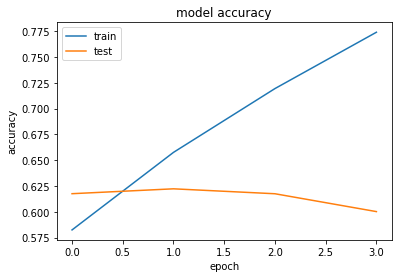

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 200
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(7, activation="softmax")(z)


model = Model(model_input, model_output)
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es, mc])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 150, 200)     6677400     ['input_1[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 150, 200)     0           ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 148, 128)     76928       ['dropout_2[0][0]']              
                                                                                              

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es, mc])

In [ ]:
model.evaluate(x_test, y_test)

# LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(LSTM(100))
model.add(Dropout(0.8))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))

# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         6677400   
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 7)                

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/100
2355/2355 [==============================] - ETA: 0s - loss: 1.2719 - acc: 0.5708
Epoch 1: val_acc improved from -inf to 0.61305, saving model to best_model.h5
2355/2355 [==============================] - 745s 315ms/step - loss: 1.2719 - acc: 0.5708 - val_loss: 1.1359 - val_acc: 0.6130
Epoch 2/100
2355/2355 [==============================] - ETA: 0s - loss: 1.0492 - acc: 0.6351
Epoch 2: val_acc improved from 0.61305 to 0.62059, saving model to best_model.h5
2355/2355 [==============================] - 748s 318ms/step - loss: 1.0492 - acc: 0.6351 - val_loss: 1.0995 - val_acc: 0.6206
Epoch 3/100
2355/2355 [==============================] - ETA: 0s - loss: 0.9195 - acc: 0.6822
Epoch 3: val_acc did not improve from 0.62059
2355/2355 [==============================] - 736s 313ms/step - loss: 0.9195 - acc: 0.6822 - val_loss: 1.1302 - val_acc: 0.6159
Epoch 4/100
2355/2355 [==============================] - ETA: 0s - loss: 0.8054 - acc: 0.7259
Epoch 4: val_acc did not improve from 

In [ ]:
model.evaluate(x_test, y_test)

589/589 [==============================] - 43s 73ms/step - loss: 1.3588 - acc: 0.6004


[1.358823537826538, 0.6003609895706177]

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))

# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         3338700   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 3,427,539
Trainable params: 3,427,539
Non-trainable params: 0
____________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/100
2355/2355 [==============================] - ETA: 0s - loss: 1.1936 - acc: 0.5913
Epoch 1: val_acc improved from -inf to 0.62112, saving model to best_model.h5
2355/2355 [==============================] - 512s 216ms/step - loss: 1.1936 - acc: 0.5913 - val_loss: 1.0833 - val_acc: 0.6211
Epoch 2/100
2355/2355 [==============================] - ETA: 0s - loss: 0.9384 - acc: 0.6693
Epoch 2: val_acc improved from 0.62112 to 0.62176, saving model to best_model.h5
2355/2355 [==============================] - 506s 215ms/step - loss: 0.9384 - acc: 0.6693 - val_loss: 1.0806 - val_acc: 0.6218
Epoch 3/100
2355/2355 [==============================] - ETA: 0s - loss: 0.7813 - acc: 0.7274
Epoch 3: val_acc did not improve from 0.62176
2355/2355 [==============================] - 509s 216ms/step - loss: 0.7813 - acc: 0.7274 - val_loss: 1.1422 - val_acc: 0.6187
Epoch 4/100
2355/2355 [==============================] - ETA: 0s - loss: 0.6545 - acc: 0.7744
Epoch 4: val_acc did not improve from 

In [ ]:
model.evaluate(x_test, y_test)